# 데이터 시각화

### <span style="color:deepskyblue">데이터 시각화가 중요한 이유?</span>

https://brunch.co.kr/@dimension-value/56

5줄 요약
- 많은 양의 데이터를 한 눈에 볼 수 있음
- 누구나 쉽게 데이터 인사이트를 찾을 수 있음
- 정확하고 빠르게 데이터를 이해할 수 있음
- 다른 사람에게 공유하거나 설득하는데 효과적임
- 다양한 분야에서 활용할 수 있음


> 따라서, 데이터를 직접 만들기보다 데이터를 수집한 후 시각화하는 경우가 훨씬 많음!

> 본 발제에서는 교재처럼 데이터를 만들지 않고, 실제 데이터를 불러오고, 해당 데이터에 적합한 시각화 기법을 활용한다.

In [327]:
# 발제에서 사용할 데이터 2개

import pandas as pd

# 넷플릭스 컨텐츠
netflix_content_df = pd.read_csv('https://raw.githubusercontent.com/minsuk1003/Python_DA_Study/main/Week%205/netflix_titles.csv')

# 넷플릭스 유저
netflix_user_df = pd.read_csv('https://raw.githubusercontent.com/minsuk1003/Python_DA_Study/main/Week%205/Netflix%20Userbase.csv')


---
## 1. `Matplotlib`

- 데이터 시각화, 2D 그래프 Plot에 사용되는 파이썬 라이브러리

- 그래프 수준이 높지는 않지만, 일반적으로 대부분의 시각화 기법을 활용할 수 있고 쓰기 간편함

- **pyplot 서브패키지**를 통해 간편하게 그래프를 만들 수 있음

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 시각화
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1) Line Plot

- 시간에 따라 어떻게 변화하는지 보여주기 위해 
-> 시계열 데이터 시각화

#### Q1-1. 넷플릭스 구독자 연령 추세 좀 알려줘

- 상급자에게 보고할 때 데이터를 단순히 보여주고 보고하기 보다, 한눈에 보여줄 수 있는 시각화 자료가 같이 필요함!

- 물론, 향후에는 생성형 AI가 더 발전되어 데이터만 주면 시각화 자료를 맛있게 보여줄 수도 있음. 현재도 수준이 높진 않지만 가능하긴 함

- 하지만, 취업할 회사에서 GPT 등의 AI를 돌릴 비용이 부족하다면? 혹은 AI가 만족할만한 그래프를 못 보여준다면?

- 따라서, 일단 어느정도 직접 할 줄 알아야 한다!

일단 유저 데이터를 보자

In [329]:
netflix_user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


Join Date와 Age 컬럼이 있다.

Join Date는 datetime 타입으로 변환해 index로 설정하고, Age 컬럼만 활용해서 그리면 되겠네

C:\Users\kms10\AppData\Local\Temp\ipykernel_1956\1044192501.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_user_df['Join Date'] = pd.to_datetime(netflix_user_df['Join Date'])


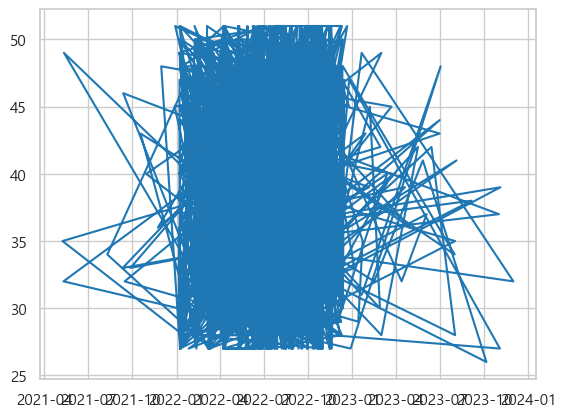

In [330]:
# datetime 변환
netflix_user_df['Join Date'] = pd.to_datetime(netflix_user_df['Join Date'])

# 인덱스 설정 후 age 컬럼만 추출
q1 = netflix_user_df.set_index('Join Date')['Age']

# 그대로 시각화
plt.plot(q1)

plt.show()

그래프가 엉망이네

각 유저의 나이를 뽑으면 안되고, 특정 기간을 잡아서 해당 기간 유저의 연령 평균을 구하자

그리고 그래프도 크게 만들자

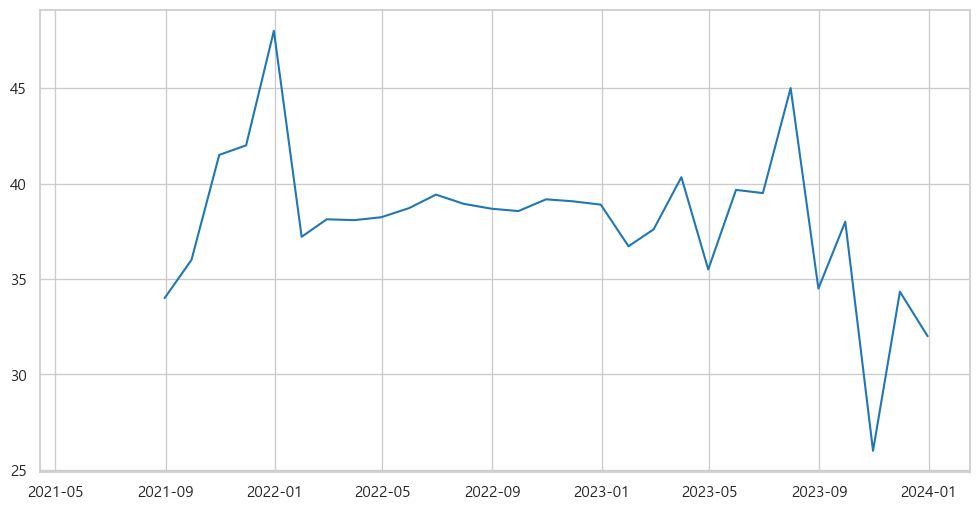

In [331]:
# 그래프 크기 설정
plt.figure(figsize=(12,6))

# 월별 유저의 평균 시각화
plt.plot(q1.resample('M').mean())

괜찮긴 한데.. 좀 아쉽다

먼저, 월별 평균보다 분기별 평균으로 해서 더 스무스한 라인으로 보자

그리고 높이를 줄이고 그래프 타이틀과 라벨을 추가하자

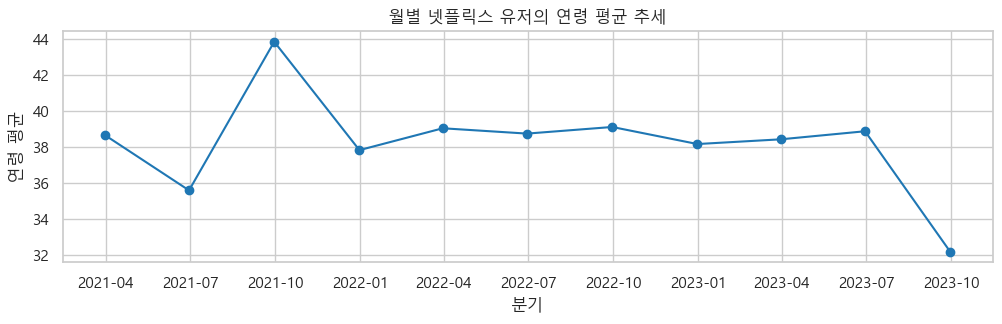

In [332]:
plt.figure(figsize=(12,3))

# 타이틀 및 라벨 추가
plt.title("월별 넷플릭스 유저의 연령 평균 추세")
plt.xlabel("분기")
plt.ylabel("연령 평균")

# 라벨은 left로 설정, 마커 추가
plt.plot(q1.resample('Q', label='left').mean(), marker='o')
plt.grid(True)

#### Q1-2. 성별에 따른 연령 추세를 알려줘

In [333]:
q1_2 = netflix_user_df.set_index('Join Date')[['Age', 'Gender']]

In [334]:
q1_2

,Age,Gender
Join Date,,
2022-01-15,28,Male
2021-05-09,35,Female
2023-02-28,42,Male
2022-10-07,51,Female
2023-01-05,33,Male
...,...,...
2022-07-25,28,Female
2022-04-08,33,Female
2022-09-08,38,Male


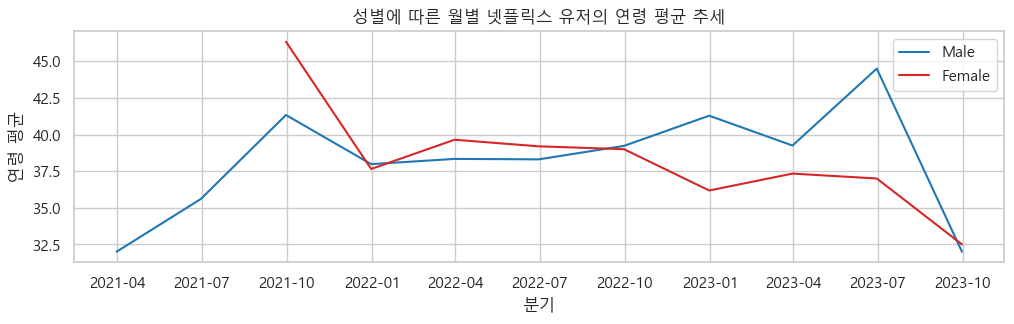

In [335]:
plt.figure(figsize=(12, 3))
plt.title("성별에 따른 월별 넷플릭스 유저의 연령 평균 추세")
plt.xlabel("분기")
plt.ylabel("연령 평균")

# gender에 따른 color를 matching
for gender, color in zip(q1_2['Gender'].unique(), ['tab:blue', 'tab:red']):
    plt.plot(
        q1_2[q1_2['Gender'] == gender]['Age'].resample('Q', label='left').mean(),
        color=color,
        label=gender,
    )
    
# 범례 추가
plt.legend()
plt.show()

### 2) Bar Chart

- 카테고리 변수에서, 해당 카테고리에 대한 빈도 수를 시각화하기 위한 방법

#### Q2. 넷플릭스 컨텐츠의 타입 별로 컨텐츠의 수를 알려줘

In [336]:
netflix_content_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [337]:
for i, j in enumerate(netflix_content_df.columns):
    print(i,j)

0 show_id
1 type
2 title
3 director
4 cast
5 country
6 date_added
7 release_year
8 rating
9 duration
10 listed_in
11 description


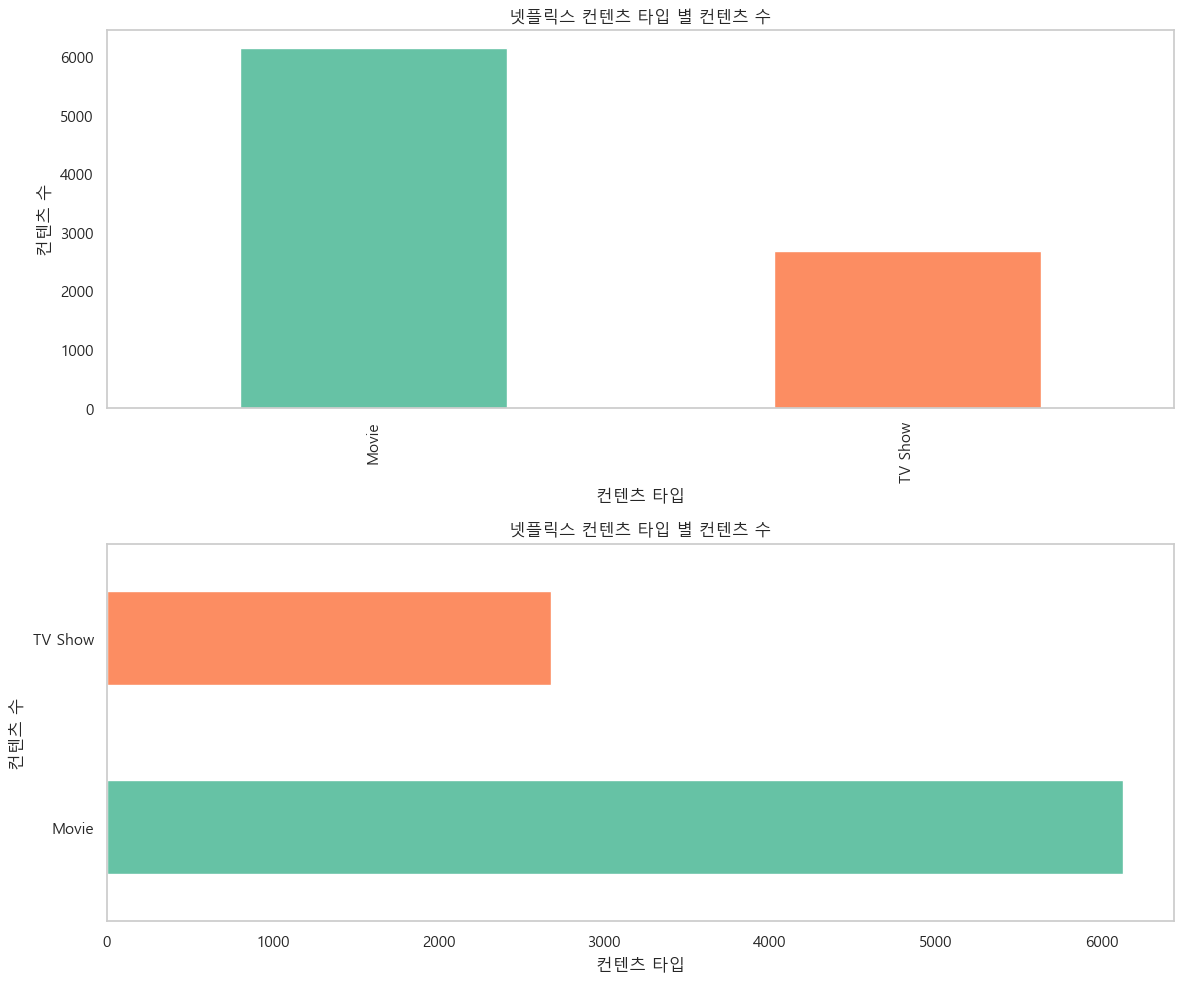

In [338]:
plt.figure(figsize=(12, 10))

# seaborn에서 color_palette 활용
colors = sns.color_palette("Set2")

# subplot을 통해 여러 개의 플롯을 배열 형태로 그림
plot_types = ['bar', 'barh']  # List of plot types

for i, plot_type in enumerate(plot_types, start=1):
    ax = plt.subplot(2, 1, i)
    netflix_content_df['type'].value_counts().plot(kind=plot_type, color=colors)
    plt.title("넷플릭스 컨텐츠 타입 별 컨텐츠 수")
    plt.xlabel("컨텐츠 타입")
    plt.ylabel("컨텐츠 수")
    plt.grid(False)

plt.tight_layout()
plt.show()

### 3) 파이 차트

- 카테고리 값의 상대적인 비교를 위한 그래프

#### Q3. 넷플릭스 구독 타입별 이용자 비율을 알려줘

In [339]:
q3 = netflix_user_df['Subscription Type'].value_counts()
q3

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

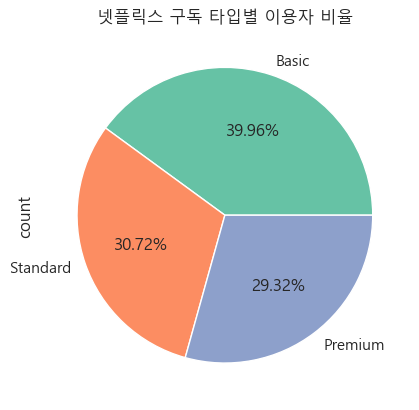

In [340]:
q3.plot(kind='pie', autopct="%.2f%%", colors=sns.color_palette("Set2"))
plt.title("넷플릭스 구독 타입별 이용자 비율")
plt.show()

### 4) 히스토그램

- 숫자형 변수에서 구간별로 데이터의 빈도를 보기 위한 시각화 방법

#### Q4. 넷플릭스 영화들의 런타임에 따른 영화 분포를 알려줘

In [341]:
netflix_movie = netflix_content_df[netflix_content_df['type'] == 'Movie']
netflix_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [342]:
netflix_movie['duration'] = netflix_movie['duration'].str[:-4].astype(float)

C:\Users\kms10\AppData\Local\Temp\ipykernel_1956\2541142087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie['duration'] = netflix_movie['duration'].str[:-4].astype(float)


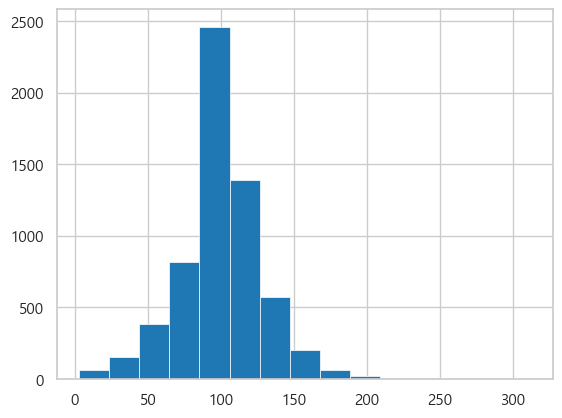

In [343]:
plt.hist(netflix_movie['duration'], bins=15, edgecolor="white", linewidth=0.5)
plt.show()

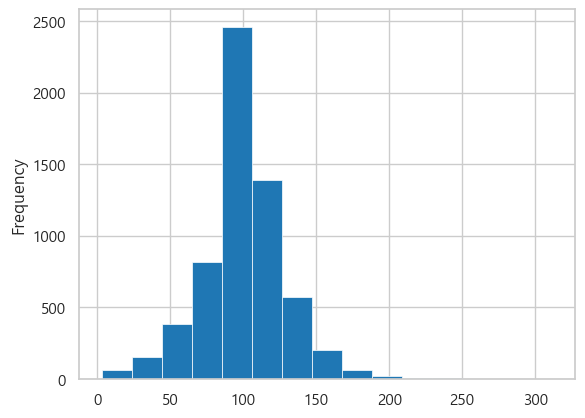

In [344]:
netflix_movie['duration'].plot(kind='hist', bins=15, edgecolor="white", linewidth=0.5)
plt.show()

#### matplotlib 기타 참고자료

[Matplotlib wikidocs](https://wikidocs.net/book/5011)

[Matplotlib](https://matplotlib.org/)

---
## 2. `Seaborn`

- Natplotlib를 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

In [345]:
# 예제 데이터도 불러올 수 있음
iris = sns.load_dataset("iris")

x = iris.petal_length.values
x

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

### 1) 1차원 실수 분포 Plot

- kdeplot
- displot

#### Q1. 넷플릭스 유저의 연령에 대한 분포를 알려줘

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


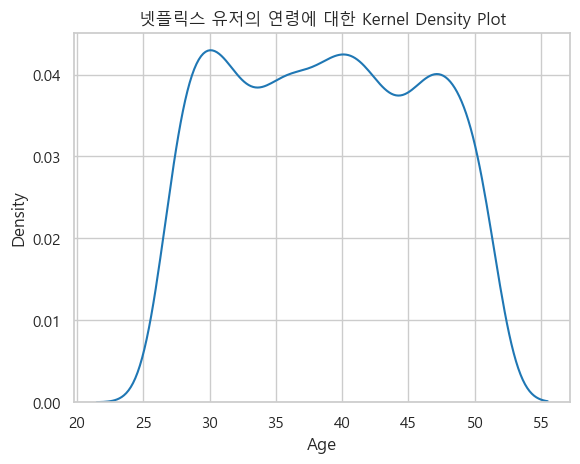

In [346]:
sns.kdeplot(netflix_user_df['Age'])
plt.title("넷플릭스 유저의 연령에 대한 Kernel Density Plot")
plt.show()

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


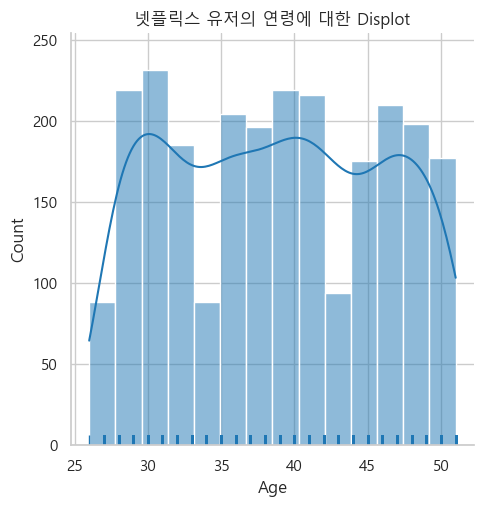

In [347]:
sns.displot(netflix_user_df['Age'], kde=True, rug=True)
plt.title("넷플릭스 유저의 연령에 대한 Displot")
plt.show()

### 2) 1차원 카테고리 Plot

- countplot

In [348]:
netflix_user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,12-07-23,Canada,48,Female,Tablet,1 Month


#### Q2. 넷플릭스 사용자들의 디바이스 이용 현황을 알려줘

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


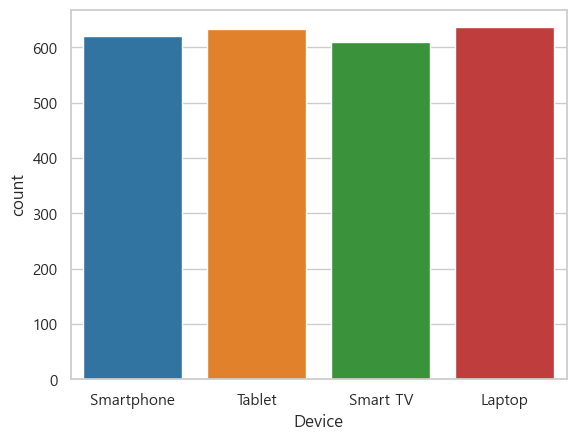

In [349]:
sns.countplot(x="Device", data=netflix_user_df)
plt.show()

### 3) 2차원 실수형 데이터

- jointplot

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

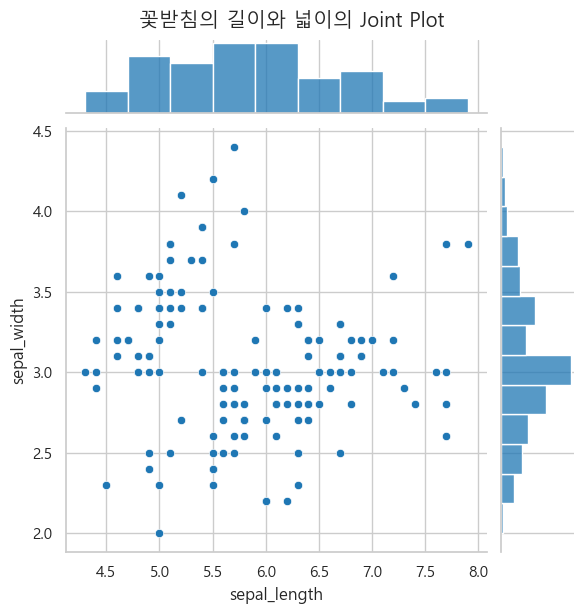

In [350]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

### 4) 3차원 이상의 실수형 데이터

- pairplot

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

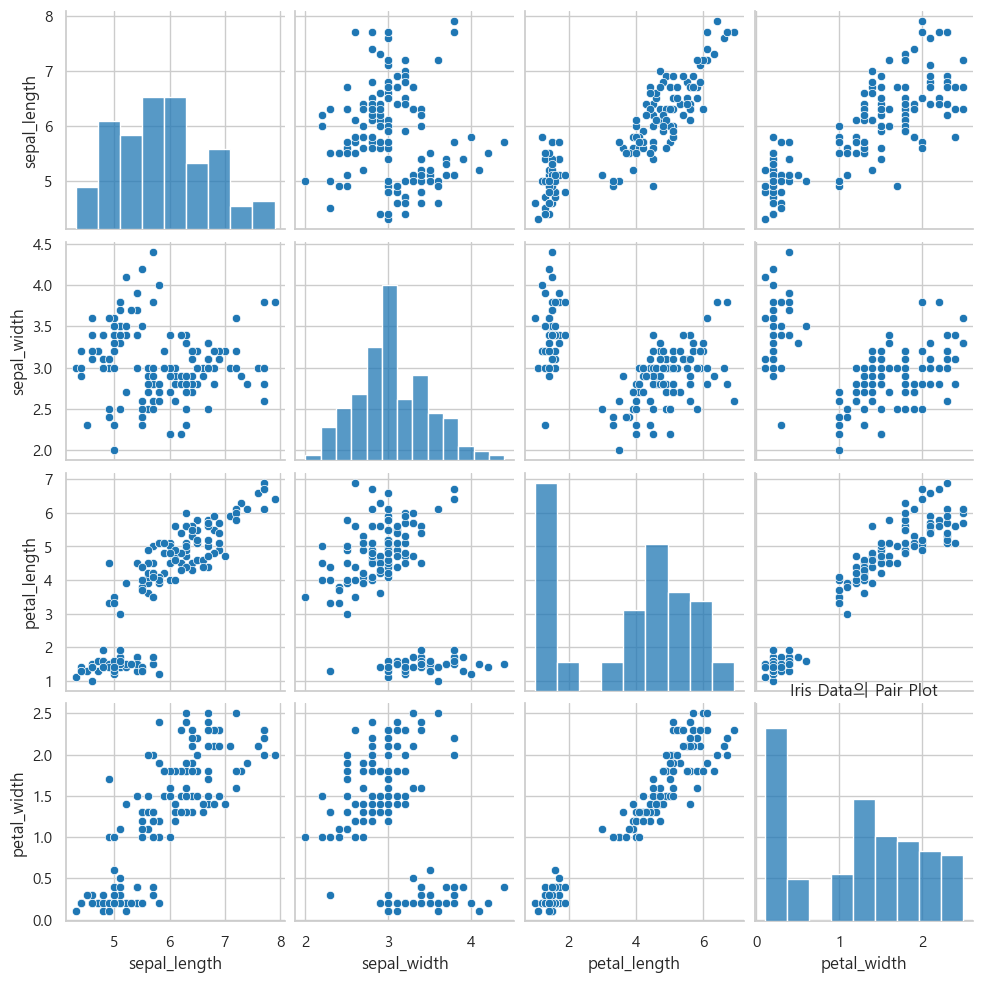

In [351]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

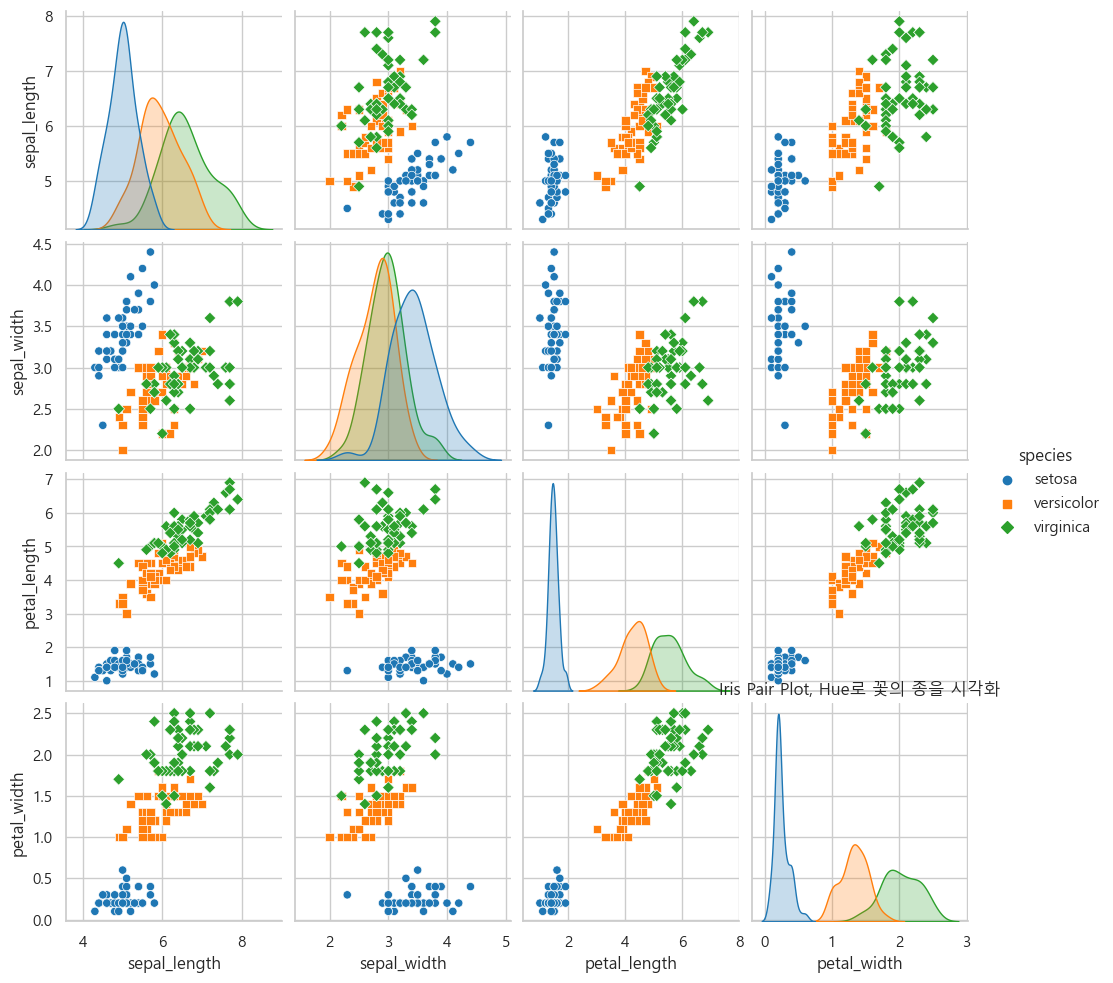

In [352]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 5) 다차원 복합 데이터

- 2차원이고, 실수 값과 카테고리 값이 섞여 있을 경우
- barplot, boxplot, pointplot, violinplot, stripplot, swarmplot

- 3차원 이상일 경우, hue 인수를 사용

In [353]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


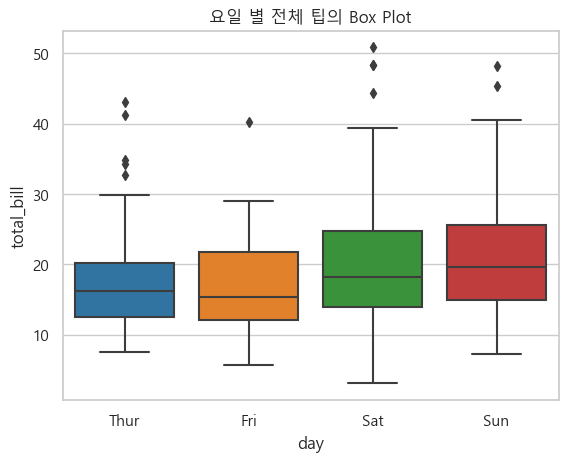

In [354]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kms10\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


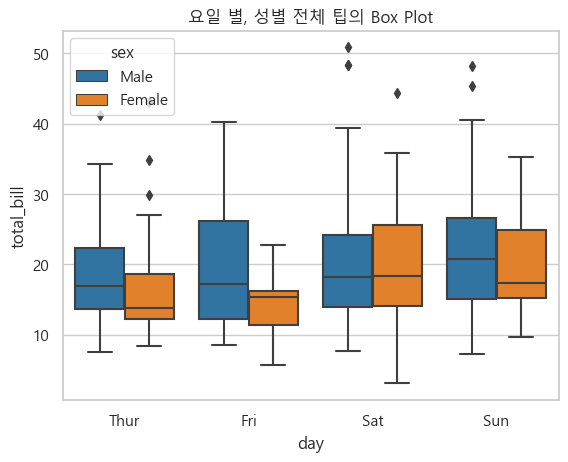

In [355]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

### 6) 상관관계

- heatmap

In [356]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [357]:
tips.iloc[:,[0,1,6]].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


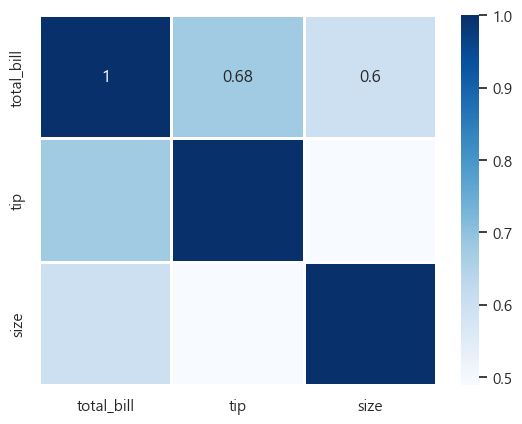

In [358]:
sns.heatmap(tips.iloc[:,[0,1,6]].corr(), annot=True, linewidths=1, cmap='Blues')
plt.show()